## Обратная связь

✅ Перезалил предыдущий сем с ответами в блице. В текущем семе тоже на все ответил. Можете на гитхабе открыть issue, если в каком-то из предыдущих ноутбуках нет ответа на какой-то из вопросов.

❗ LSTM/GRU

❗ Attention

❗ Scaled Attention

## Работа над ошибками

## Чем GRU отличается от LSTM?

* `GRU` меньше параметеров чем `LSTM` за счет меньшего количества гейтов.
* В `GRU` отказались от cell state.



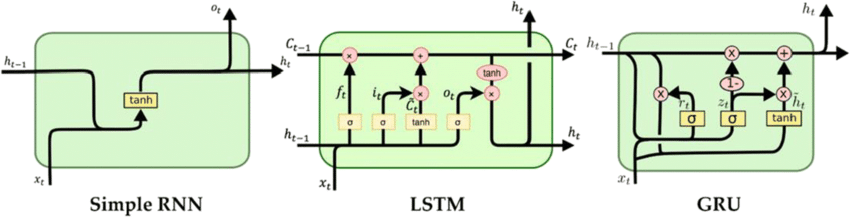

In [ ]:
# inputs ~ [ bs, seq_len ] dtype = torch.long
# inputs_embeds ~ [ bs, seq_len, hidden_size ] dtype = torch.long
# attentioned_embeddings ~ [ bs,  ]


## Attention

**Цель слоя Attention:** моделирование влияний и взаимодействий между токенами для обучения контекстных эмбэддингов

Попробуем рассмотреть на примере




In [ ]:
mha = nn.MultiheadAttention(embed_dim=64, num_heads=8, batch_first=True)

batch_size = 3
seq_len = 7
embedding_dim = 64
q = k = v = torch.rand([batch_size, seq_len, embedding_dim])

attn_output, attn_output_weights = mha.forward(q, k, v)

In [ ]:
# Каждый полученный контекстный эмбэддинг
# создержит взвешенную сумму всех других
# эмбэддингов внутри последовательности
attn_output.shape

torch.Size([3, 7, 64])

In [ ]:
attn_output_weights.shape

torch.Size([3, 7, 7])

**Вопрос!** Зачем после того как мы получили контекстные эмбэддинги, запускать еще один слой трансформера?

[ The animated Transformer: the Transformer model explained the fun way! ](https://youtu.be/NzLwHcqE6Jw?t=354&si=zZKjFyz2mOo2BGa5)

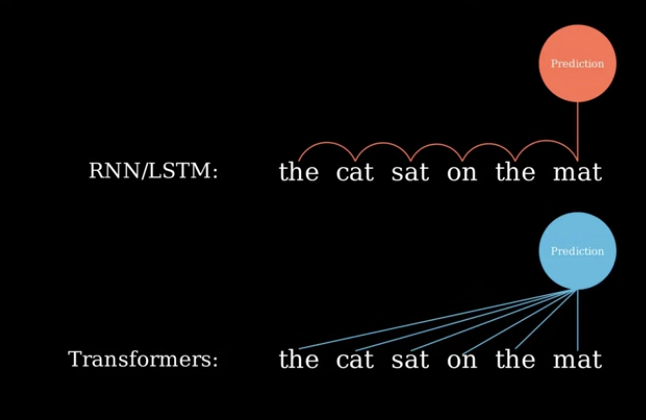

### Зачем нужен Scaled Dot-Product Attention?

Скейл (деление на корень из размерности) позволяет лучше протекать градиентам.

Если не скейлить, то числа под софтмаксом получаются большими после перемножения матриц.
Большие по модулю числа в софтмаксе могут привести к сильному и значительному перевешиванию одного из чисел. Из-за чего градиенты по остальным интексам не потекут


https://ai.stackexchange.com/a/42197





In [ ]:
import torch
import torch.nn as nn
sm = nn.Softmax(dim=0)

# предположим, что мы посчитали q @ k.T для размерности 256
# и в результате мы могли получить числа с СКО 16
attention_qkt = torch.tensor([ -16.0, -8.0, 0.0, 8.0, 16.0 ])

# not scaled softmax
sm( attention_qkt )

tensor([1.2660e-14, 3.7739e-11, 1.1250e-07, 3.3535e-04, 9.9966e-01])

In [ ]:
# scaled softmax
sm( attention_qkt / 16 )

tensor([0.0580, 0.0956, 0.1577, 0.2600, 0.4287])

## Bert

# [How to Read a Paper?](https://web.stanford.edu/class/ee384m/Handouts/HowtoReadPaper.pdf)

### THE THREE-PASS APPROACH

1. The first pass gives you a general idea about the paper.
2. The second pass lets you grasp the paper’s content, but not its details.
3. The third pass helps you understand the paper in depth. (with Appendix)

# BERT (16 pages)

* [Paper](https://arxiv.org/pdf/1810.04805.pdf)
* [Annotated Paper (Akshay Uppal)](https://au1206.github.io/annotated%20paper/BERT/)

## The first pass

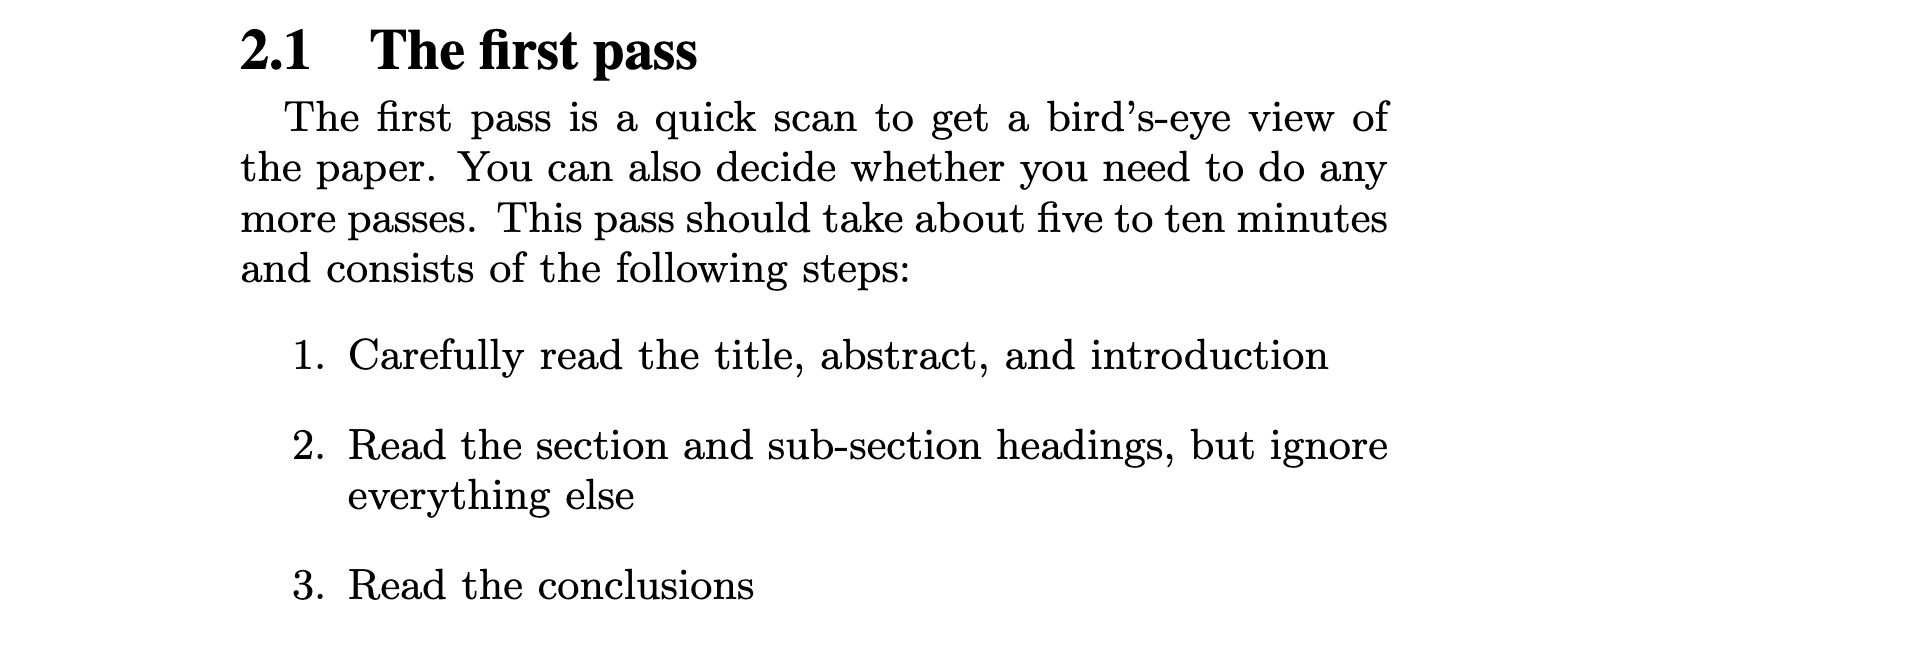


At the end of the first pass, you should be able to answer
the five Cs:

1. **Category**: What type of paper is this? A measurement paper? An analysis of an existing system? A
description of a research prototype?

<!-- New language model and architecture proposal -->

2. **Context**: Which other papers is it related to? Which
theoretical bases were used to analyze the problem?


3. **Correctness**: Do the assumptions appear to be valid?

4. **Contributions**: What are the paper’s main contributions?



5. **Clarity**: Is the paper well written?

## The second pass


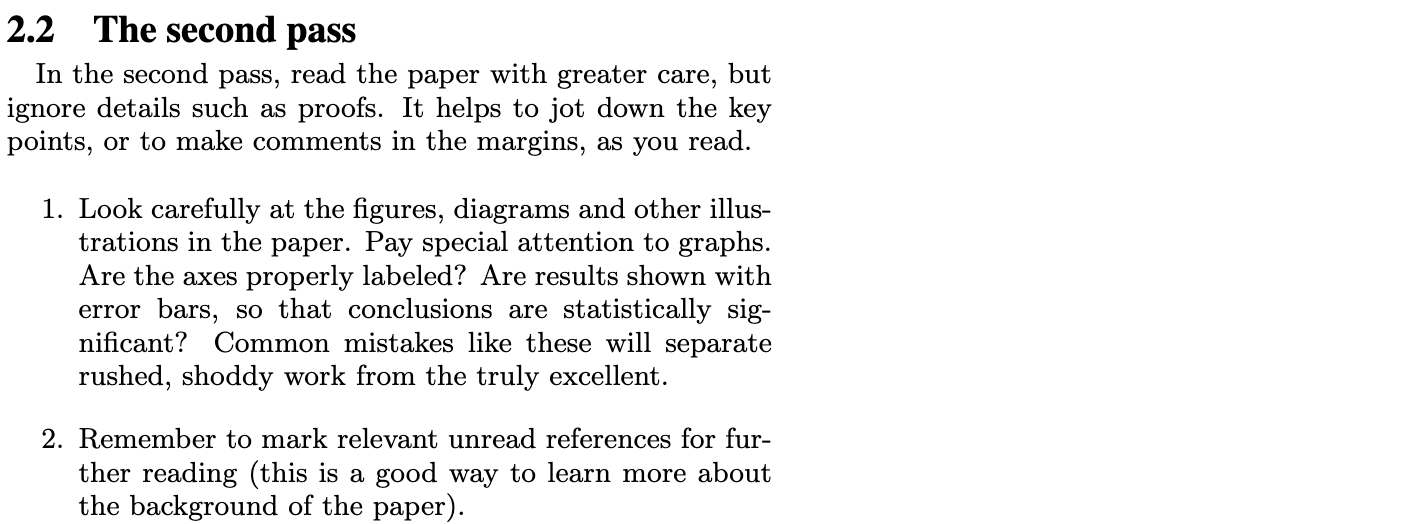

# Блиц

## Почему self-supervised pretraining -- это круто? Ведь для конкретной задачи все равно нужно делать finetuning.

<!--
Данных, которые доступны для обучения без учителя (self-supervised pretraining) на порядки больше, чем
размеченных данных. Поэтому важно "базовое" понимание языка получить на большом масштабе и использовать обощающие способности на локальной задаче.
-->

### Чем задача LM (Language Modeling) отличается от MLM (Masked Language Modeling)? Приведите примеры моделей, которые используют соответствующие задачи в обучении.

<!--

LM - задача предсказывания текена-за токеном по одному.

MLM - задача предсказать реальный токен по маске. Токены маскируются в 15% случаев.

В этих 15% надо предсказать исходный токен:
* В 80% (0.15*0.8 в абсолюте) используется [MASK] токен
* В 10% (0.15*0.1) используется рандомный токен
* В 10% (0.15*0.1) используется исходный токен

Примеры:
* LM: T5, GPT, VanillaTransformer
* MLM: BERT, RoBerta, DistilBERT

 -->


## Можно ли использовать Bert для генерации последовательностей?

<!--
Вообще говоря, изкоробки Bert не предназначена для задачи генерации. Только для задачи классификации или MLM.

Но! В теории, можно через разные методы заставить encoder-only трансформер решать задачу генерации.
См [non autoregressive transformers](https://github.com/LitterBrother-Xiao/Overview-of-Non-autoregressive-Applications) -->

## Чем отличается Transformer Encoder от Transformer Decoder?

<!--
На логическом уровне на примере задачи перевода:
* Encoder запускается 1 раз для генерации контекстных эмбэддингов входной последовательности
* Decoder запускается N раз для генерации N токенов. Отвечает за генерацию токенов целевой последовательности

На уровне архитектуры:
* в Encoder есть только self-attention последовательности.
* Decoder есть self-attention + cross-attention.
 -->

## Что такое segment embeddings в Bert? Для какой задачи он используется?

<!--

Используется для задачи определения последовательных предложений.

Ко всем токенам первого предложения добавляется эмбэддинг `A`. Ко всем токенам второго - `B`. Таким образом все токены каждого предложения имеют одну общую составляющую или скорее смещение, которое будет отличать его от токенов второго предложения.
Идея аналогичная обучаемым Positional Embedding.

 -->

## Зачем может понадобиться маска token_type_ids?

## В задаче MLM в трейне мы заменяем всегда только токены `[MASK]`, но во время инференса у нас нет никаких `[MASK]` токенов. К каким проблемам это может привести? Как авторы это прокомментировали?

<!--
Ответ на этот вопрос. Есть в Приложении "A.1".

Masked LM and the Masking Procedure As- suming the unlabeled sentence is my dog is hairy, and during the random masking procedure we chose the 4-th token (which corresponding to hairy), our masking procedure can be further illustrated by

• 80% of the time: Replace the word with the [MASK] token, e.g., my dog is hairy → my dog is [MASK]
• 10% of the time: Replace the word with a randomword,e.g.,my dog is hairy → my dog is apple
• 10% of the time: Keep the word un- changed,e.g.,my dog is hairy → my dog is hairy. The purpose of this is to bias the representation towards the actual observed word.

 -->

## Сколько по времени обучалась BERT-base?

<!--
Претрейн 4 дня на 64 TPU - Приложение A.2
 -->

## Как секции `5.1` авторы получили `Left-To-Right` model?

<!--

A left-context-only model which is trained using a standard Left-to-Right (LTR) LM, rather than an MLM. The left-only constraint was also applied at fine-tuning, because removing it introduced a pre-train/fine-tune mismatch that degraded downstream performance

 -->

## Что будет, если обучать BERT не (128,000 words/batch * 1,000,000 steps) шагов, а 500k шагов? Как это повлияет на качество fine-tuning'а?

<!--

Приложение C.1:

Question: Does BERT really need such a large amount of pre-training (128,000 words/batch * 1,000,000 steps) to achieve high fine-tuning accuracy?

Answer: Yes, BERTBASE achieves almost 1.0% additional accuracy on MNLI when trained on 1M steps compared to 500k steps.

-->